In [1]:
from artificialmap.elements import create_element

# Working with already generated elements
Invoking `generate_element_from_model` you get numpy.ndarray or `GeneratedElement` instance - it depends on the value of `matrix_only` parameter. Besides operations defined in NumPy library, `GeneratedElement` class derives set of methods which are convenient while creating an artificial map.

Firstly, we create elements and instances of the `GeneratedElemenet` class, by invoking the constructor explicitely or by setting `matrix_only` parameter of the `generete_element_from_model` method on `False`.

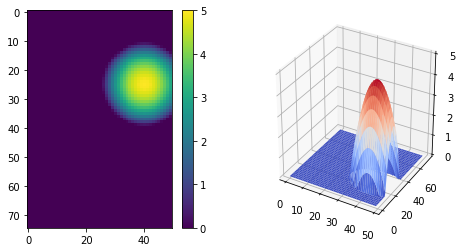

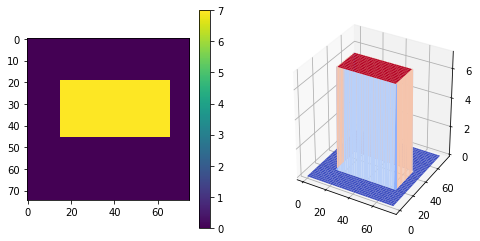

In [2]:
from artificialmap.generatedelement import GeneratedElement

rounded_hill = create_element('rounded_hill', radius=5, height=15, size=(15, 10), central_position=(5, 8), in_resolution=False, resolution=5)
building = create_element('building', length=10, width=5, height=7, size=(15, 15), central_position=(6.5, 8), in_resolution=False, resolution=5)

gen_rounded_hill = rounded_hill.generate_element_from_model(matrix_only=False)
gen_building = GeneratedElement(matrix=building.generate_element_from_model(matrix_only=True), resolution=building.resolution)

gen_rounded_hill.show()
gen_building.show()

First operation you may perform is cropping generated element from some value. For example, we want to drop ale 0 values from rounded hill matrix and reduce its dimensions. Method `crop` will do this for us.

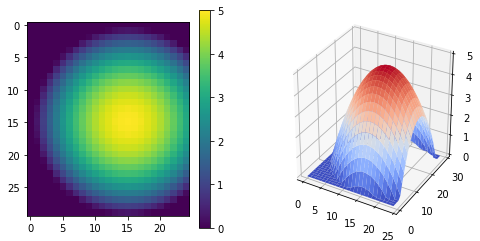

In [3]:
cropped_hill = gen_rounded_hill.crop(threshold=0)
cropped_hill.show()

Then you may combine both generated elements by using `place` method. Please note that you may pass tuple with negative integers as a `left_upper_corner` parameter.

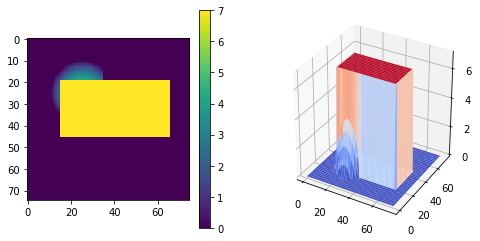

In [4]:
hill_placed_on_building = gen_building.place(element=cropped_hill, left_upper_corner=(2, 2), in_resolution=False, bigger_values_only=True)
hill_placed_on_building.show()

We set `bigger_values_only` parameter on True. It means that cells from element we invoke method on will be REPLACED by cells from other element if values o other's element will be bigger. Parameter has influence when `replace` is set on False.

By setting `replace` to `True` makes the element's cells replaced on corresponding positions.

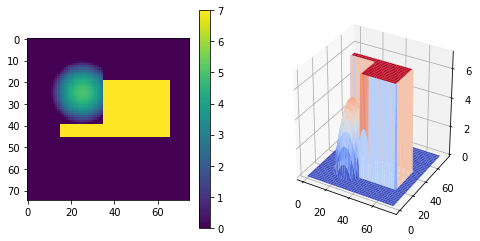

In [5]:
hill_placed_on_building = gen_building.place(element=cropped_hill, left_upper_corner=(2, 2), in_resolution=False, replace=True)
hill_placed_on_building.show()

Method `rotate` lets us rotate our element (who would have thought). After performing rotation, size of the matrix containing element is enlarged in order not to lose information.

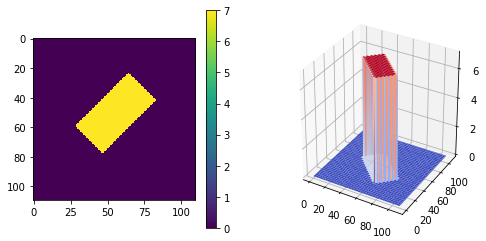

In [6]:
rotated_building = gen_building.rotate(angle=45)
rotated_building.show()

It's worth mentioning that upsampling in this case is based on interpolation provided by `Pillow` library.